In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import os
import sys
from sklearn.model_selection import train_test_split

In [2]:
sys.path.append('/home/alessia/Tirocinio/Fuzzy-SVM')

In [3]:
from HYP_SVM import *

In [17]:
dataset=pd.read_csv("Dataset/iris-setosa.csv")
X = dataset[["sepal_length", "sepal_width"]].values
y = dataset["species"].values
y=np.where(y==0,-1, y)
#print("features:\n", X, "\nLabels:\n ", y)

In [18]:
from sklearn.preprocessing import StandardScaler
iris_values_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
iris_values_2d = pca_2d.fit_transform(iris_values_std)
#print(iris_values_2d)

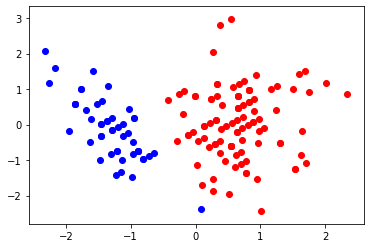

In [19]:
#stampa
%matplotlib inline
import matplotlib.pyplot as plt

def gr_dataset(): 
    for lab, col in zip((1, -1),
                        ('blue', 'red')):
        plt.scatter(iris_values_2d[y==lab, 0],
                    iris_values_2d[y==lab, 1],
                    label=lab,
                    c=col)

gr_dataset()

In [20]:
def gr_membership_contour(estimated_membership):
    x = np.arange(-4, 4, .1)
    y = np.arange(-4, 4, .1)
    X, Y = np.meshgrid(x, y)
    normalized = []
    #print(Y)
    zs = np.array([estimated_membership(np.array(list(zip(np.ravel(x), np.ravel(y)))))
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    print(Z)
    normalized = (Z-Z.min())/(Z.max()-Z.min())
    print(normalized)
    membership_contour = plt.contour(X, Y, normalized,
                                     levels=(.1, .3, .5, .95), colors='k')
    #print(membership_contour)
    plt.clabel(membership_contour, inline=1)

In [21]:
def generator(m):
    return (-4 + np.random.random(2*m) * 8).reshape((m, 2))

In [22]:
xTrain, xTest, yTrain, yTest = train_test_split(iris_values_2d, y, test_size=80)

In [23]:
C_vals = [1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4]
sigma = [9e-2, 9e-1, 9, 9e+1, 9e+2, 9e+3, 9e+4]
parameters = {'C': C_vals, 'sigma': sigma}

model = HYP_SVM(C=100, kernel=gaussian_kernel, sigma=0.9)

clf = GridSearchCV(model, parameters, cv=5)
grid_result = clf.fit(X=xTrain, y=yTrain)

     pcost       dcost       gap    pres   dres
 0: -1.3196e+01 -4.0659e+00  2e+02  1e+01  3e-16
 1: -3.0059e+00 -1.1979e+00  1e+01  1e+00  4e-16
 2: -4.5660e-01 -1.0242e+00  8e-01  1e-02  9e-16
 3: -4.1672e-01 -4.4167e-01  2e-02  1e-17  9e-16
 4: -4.1773e-01 -4.1976e-01  2e-03  1e-17  4e-16
 5: -4.1787e-01 -4.1802e-01  1e-04  1e-17  2e-16
 6: -4.1789e-01 -4.1789e-01  4e-06  2e-17  2e-16
 7: -4.1789e-01 -4.1789e-01  4e-08  2e-17  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.3196e+01 -4.0659e+00  2e+02  1e+01  3e-16
 1: -3.0059e+00 -1.1979e+00  1e+01  1e+00  4e-16
 2: -4.5660e-01 -1.0242e+00  8e-01  1e-02  9e-16
 3: -4.1672e-01 -4.4167e-01  2e-02  1e-17  9e-16
 4: -4.1773e-01 -4.1976e-01  2e-03  1e-17  4e-16
 5: -4.1787e-01 -4.1802e-01  1e-04  1e-17  2e-16
 6: -4.1789e-01 -4.1789e-01  4e-06  2e-17  2e-16
 7: -4.1789e-01 -4.1789e-01  4e-08  2e-17  3e-16
Optimal solution found.
12 out of 14 predictions correct
Accuracy 0.8571428571428571
Errore quad

     pcost       dcost       gap    pres   dres
 0: -3.3617e+00 -2.4193e+00  2e+02  1e+01  2e-16
 1: -1.9509e+00 -1.6477e+00  1e+01  9e-01  4e-16
 2: -2.4148e-01 -9.8295e-01  8e-01  6e-03  2e-15
 3: -3.0685e-01 -4.5507e-01  2e-01  1e-03  7e-16
 4: -3.4403e-01 -3.7289e-01  3e-02  4e-06  4e-16
 5: -3.4682e-01 -3.5128e-01  4e-03  6e-07  4e-16
 6: -3.4838e-01 -3.4936e-01  1e-03  8e-08  3e-16
 7: -3.4865e-01 -3.4901e-01  4e-04  2e-08  5e-16
 8: -3.4876e-01 -3.4888e-01  1e-04  7e-09  4e-16
 9: -3.4880e-01 -3.4883e-01  3e-05  6e-10  3e-16
10: -3.4882e-01 -3.4882e-01  8e-07  5e-12  3e-16
11: -3.4882e-01 -3.4882e-01  2e-08  9e-14  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.3617e+00 -2.4193e+00  2e+02  1e+01  2e-16
 1: -1.9509e+00 -1.6477e+00  1e+01  9e-01  4e-16
 2: -2.4148e-01 -9.8295e-01  8e-01  6e-03  2e-15
 3: -3.0685e-01 -4.5507e-01  2e-01  1e-03  7e-16
 4: -3.4403e-01 -3.7289e-01  3e-02  4e-06  4e-16
 5: -3.4682e-01 -3.5128e-01  4e-03  6e-07  4e-1

     pcost       dcost       gap    pres   dres
 0: -2.5232e+01 -1.2226e+00  3e+02  2e+01  9e-16
 1: -6.2332e-01 -1.1760e+00  4e+00  2e-01  1e-15
 2: -3.7407e-01 -8.2237e-01  4e-01  3e-17  7e-16
 3: -3.7988e-01 -3.8521e-01  5e-03  1e-17  5e-16
 4: -3.7999e-01 -3.8006e-01  7e-05  1e-17  7e-16
 5: -3.7999e-01 -3.8000e-01  1e-05  1e-17  4e-16
 6: -3.7999e-01 -3.7999e-01  2e-06  1e-17  3e-16
 7: -3.7999e-01 -3.7999e-01  6e-07  1e-17  5e-16
 8: -3.7999e-01 -3.7999e-01  8e-08  3e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5232e+01 -1.2226e+00  3e+02  2e+01  9e-16
 1: -6.2332e-01 -1.1760e+00  4e+00  2e-01  1e-15
 2: -3.7407e-01 -8.2237e-01  4e-01  3e-17  7e-16
 3: -3.7988e-01 -3.8521e-01  5e-03  1e-17  5e-16
 4: -3.7999e-01 -3.8006e-01  7e-05  1e-17  7e-16
 5: -3.7999e-01 -3.8000e-01  1e-05  1e-17  4e-16
 6: -3.7999e-01 -3.7999e-01  2e-06  1e-17  3e-16
 7: -3.7999e-01 -3.7999e-01  6e-07  1e-17  5e-16
 8: -3.7999e-01 -3.7999e-01  8e-08  3e-17  4e-1

     pcost       dcost       gap    pres   dres
 0: -2.2184e+01 -1.1903e+00  3e+02  2e+01  6e-16
 1: -5.4541e-01 -1.1839e+00  4e+00  2e-01  9e-16
 2: -3.0645e-01 -8.0557e-01  5e-01  3e-03  7e-16
 3: -2.9984e-01 -3.0625e-01  6e-03  3e-05  1e-15
 4: -3.0000e-01 -3.0006e-01  6e-05  3e-07  4e-16
 5: -3.0000e-01 -3.0000e-01  7e-07  3e-09  5e-16
 6: -3.0000e-01 -3.0000e-01  7e-09  3e-11  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.2184e+01 -1.1903e+00  3e+02  2e+01  6e-16
 1: -5.4541e-01 -1.1839e+00  4e+00  2e-01  9e-16
 2: -3.0645e-01 -8.0557e-01  5e-01  3e-03  7e-16
 3: -2.9984e-01 -3.0625e-01  6e-03  3e-05  1e-15
 4: -3.0000e-01 -3.0006e-01  6e-05  3e-07  4e-16
 5: -3.0000e-01 -3.0000e-01  7e-07  3e-09  5e-16
 6: -3.0000e-01 -3.0000e-01  7e-09  3e-11  4e-16
Optimal solution found.
6 out of 14 predictions correct
Accuracy 0.42857142857142855
Errore quadratico medio:  1.5118578920369088
     pcost       dcost       gap    pres   dres
 0: -2.5358e+01 

     pcost       dcost       gap    pres   dres
 0: -1.2157e+01 -1.2545e+01  2e+02  2e+01  3e-16
 1: -4.5652e+00 -1.0081e+01  2e+01  1e+00  4e-16
 2: -2.8262e+00 -5.6471e+00  3e+00  2e-16  1e-15
 3: -2.8704e+00 -2.9686e+00  1e-01  1e-16  3e-16
 4: -2.8788e+00 -2.8841e+00  5e-03  1e-16  2e-16
 5: -2.8792e+00 -2.8794e+00  2e-04  1e-16  2e-16
 6: -2.8792e+00 -2.8792e+00  3e-06  1e-16  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.2157e+01 -1.2545e+01  2e+02  2e+01  3e-16
 1: -4.5652e+00 -1.0081e+01  2e+01  1e+00  4e-16
 2: -2.8262e+00 -5.6471e+00  3e+00  2e-16  1e-15
 3: -2.8704e+00 -2.9686e+00  1e-01  1e-16  3e-16
 4: -2.8788e+00 -2.8841e+00  5e-03  1e-16  2e-16
 5: -2.8792e+00 -2.8794e+00  2e-04  1e-16  2e-16
 6: -2.8792e+00 -2.8792e+00  3e-06  1e-16  2e-16
Optimal solution found.
6 out of 14 predictions correct
Accuracy 0.42857142857142855
Errore quadratico medio:  1.5118578920369088
     pcost       dcost       gap    pres   dres
 0: -1.3255e+01 

     pcost       dcost       gap    pres   dres
 0: -1.8322e+01 -1.3259e+01  3e+02  2e+01  5e-16
 1: -4.8124e+00 -1.1027e+01  1e+01  5e-01  7e-16
 2: -3.6476e+00 -5.4219e+00  2e+00  2e-16  9e-16
 3: -3.6933e+00 -3.9072e+00  2e-01  1e-16  6e-16
 4: -3.7170e+00 -3.7524e+00  4e-02  1e-16  4e-16
 5: -3.7296e+00 -3.7353e+00  6e-03  1e-16  4e-16
 6: -3.7321e+00 -3.7330e+00  9e-04  2e-16  3e-16
 7: -3.7326e+00 -3.7326e+00  6e-05  1e-16  5e-16
 8: -3.7326e+00 -3.7326e+00  8e-07  2e-16  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.8322e+01 -1.3259e+01  3e+02  2e+01  5e-16
 1: -4.8124e+00 -1.1027e+01  1e+01  5e-01  7e-16
 2: -3.6476e+00 -5.4219e+00  2e+00  2e-16  9e-16
 3: -3.6933e+00 -3.9072e+00  2e-01  1e-16  6e-16
 4: -3.7170e+00 -3.7524e+00  4e-02  1e-16  4e-16
 5: -3.7296e+00 -3.7353e+00  6e-03  1e-16  4e-16
 6: -3.7321e+00 -3.7330e+00  9e-04  2e-16  3e-16
 7: -3.7326e+00 -3.7326e+00  6e-05  1e-16  5e-16
 8: -3.7326e+00 -3.7326e+00  8e-07  2e-16  6e-1

     pcost       dcost       gap    pres   dres
 0: -2.8873e+01 -1.1778e+01  3e+02  2e+01  9e-16
 1: -4.1342e+00 -1.1272e+01  9e+00  9e-02  9e-16
 2: -4.1891e+00 -4.4286e+00  2e-01  1e-03  4e-16
 3: -4.1999e+00 -4.2023e+00  3e-03  1e-05  4e-16
 4: -4.2000e+00 -4.2000e+00  4e-05  2e-07  4e-16
 5: -4.2000e+00 -4.2000e+00  1e-05  6e-08  4e-16
 6: -4.2000e+00 -4.2000e+00  6e-06  3e-08  4e-16
 7: -4.2000e+00 -4.2000e+00  2e-06  9e-09  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.8873e+01 -1.1778e+01  3e+02  2e+01  9e-16
 1: -4.1342e+00 -1.1272e+01  9e+00  9e-02  9e-16
 2: -4.1891e+00 -4.4286e+00  2e-01  1e-03  4e-16
 3: -4.1999e+00 -4.2023e+00  3e-03  1e-05  4e-16
 4: -4.2000e+00 -4.2000e+00  4e-05  2e-07  4e-16
 5: -4.2000e+00 -4.2000e+00  1e-05  6e-08  4e-16
 6: -4.2000e+00 -4.2000e+00  6e-06  3e-08  4e-16
 7: -4.2000e+00 -4.2000e+00  2e-06  9e-09  4e-16
Optimal solution found.
12 out of 14 predictions correct
Accuracy 0.8571428571428571
Errore quad

     pcost       dcost       gap    pres   dres
 0: -2.6871e+01 -1.1907e+01  3e+02  2e+01  1e-15
 1: -3.8395e+00 -1.1352e+01  1e+01  2e-01  9e-16
 2: -3.5720e+00 -4.0589e+00  5e-01  2e-16  6e-16
 3: -3.5997e+00 -3.6047e+00  5e-03  1e-16  5e-16
 4: -3.6000e+00 -3.6000e+00  5e-05  1e-16  6e-16
 5: -3.6000e+00 -3.6000e+00  6e-07  1e-16  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.6871e+01 -1.1907e+01  3e+02  2e+01  1e-15
 1: -3.8395e+00 -1.1352e+01  1e+01  2e-01  9e-16
 2: -3.5720e+00 -4.0589e+00  5e-01  2e-16  6e-16
 3: -3.5997e+00 -3.6047e+00  5e-03  1e-16  5e-16
 4: -3.6000e+00 -3.6000e+00  5e-05  1e-16  6e-16
 5: -3.6000e+00 -3.6000e+00  6e-07  1e-16  6e-16
Optimal solution found.
9 out of 14 predictions correct
Accuracy 0.6428571428571429
Errore quadratico medio:  1.1952286093343936
     pcost       dcost       gap    pres   dres
 0: -2.8875e+01 -1.1778e+01  3e+02  2e+01  7e-16
 1: -4.1342e+00 -1.1272e+01  9e+00  9e-02  1e-15
 2: -4.1891e+00 -

     pcost       dcost       gap    pres   dres
 0: -4.2263e+00 -7.5250e+01  2e+02  1e+00  5e-16
 1: -2.7002e+00 -3.2777e+01  3e+01  3e-16  4e-16
 2: -4.6910e+00 -9.4874e+00  5e+00  3e-16  4e-16
 3: -5.8544e+00 -6.7203e+00  9e-01  1e-16  3e-16
 4: -6.1556e+00 -6.2759e+00  1e-01  3e-16  3e-16
 5: -6.2019e+00 -6.2101e+00  8e-03  6e-16  3e-16
 6: -6.2054e+00 -6.2059e+00  4e-04  4e-16  3e-16
 7: -6.2057e+00 -6.2057e+00  9e-06  2e-16  3e-16
 8: -6.2057e+00 -6.2057e+00  1e-07  7e-16  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.2263e+00 -7.5250e+01  2e+02  1e+00  5e-16
 1: -2.7002e+00 -3.2777e+01  3e+01  3e-16  4e-16
 2: -4.6910e+00 -9.4874e+00  5e+00  3e-16  4e-16
 3: -5.8544e+00 -6.7203e+00  9e-01  1e-16  3e-16
 4: -6.1556e+00 -6.2759e+00  1e-01  3e-16  3e-16
 5: -6.2019e+00 -6.2101e+00  8e-03  6e-16  3e-16
 6: -6.2054e+00 -6.2059e+00  4e-04  4e-16  3e-16
 7: -6.2057e+00 -6.2057e+00  9e-06  2e-16  3e-16
 8: -6.2057e+00 -6.2057e+00  1e-07  7e-16  3e-1

     pcost       dcost       gap    pres   dres
 0: -3.1219e+01 -1.1142e+02  3e+02  2e+00  1e-15
 1: -2.6945e+01 -6.7261e+01  4e+01  7e-16  1e-15
 2: -2.9118e+01 -3.4355e+01  5e+00  2e-15  1e-15
 3: -3.0667e+01 -3.1432e+01  8e-01  1e-15  1e-15
 4: -3.0978e+01 -3.1139e+01  2e-01  2e-15  1e-15
 5: -3.1056e+01 -3.1072e+01  2e-02  1e-15  1e-15
 6: -3.1064e+01 -3.1064e+01  3e-04  2e-15  1e-15
 7: -3.1064e+01 -3.1064e+01  3e-06  2e-15  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.1219e+01 -1.1142e+02  3e+02  2e+00  1e-15
 1: -2.6945e+01 -6.7261e+01  4e+01  7e-16  1e-15
 2: -2.9118e+01 -3.4355e+01  5e+00  2e-15  1e-15
 3: -3.0667e+01 -3.1432e+01  8e-01  1e-15  1e-15
 4: -3.0978e+01 -3.1139e+01  2e-01  2e-15  1e-15
 5: -3.1056e+01 -3.1072e+01  2e-02  1e-15  1e-15
 6: -3.1064e+01 -3.1064e+01  3e-04  2e-15  1e-15
 7: -3.1064e+01 -3.1064e+01  3e-06  2e-15  1e-15
Optimal solution found.
14 out of 14 predictions correct
Accuracy 1.0
Errore quadratico medio:  

     pcost       dcost       gap    pres   dres
 0: -4.3926e+01 -1.2593e+02  4e+02  2e+00  1e-15
 1: -2.9328e+01 -7.9732e+01  5e+01  9e-16  1e-15
 2: -2.9931e+01 -3.0677e+01  7e-01  8e-16  1e-15
 3: -2.9999e+01 -3.0007e+01  9e-03  7e-16  8e-16
 4: -2.9999e+01 -3.0000e+01  1e-03  1e-15  9e-16
 5: -3.0000e+01 -3.0000e+01  2e-04  2e-16  7e-16
 6: -3.0000e+01 -3.0000e+01  3e-05  2e-16  8e-16
 7: -3.0000e+01 -3.0000e+01  1e-05  2e-16  9e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.3926e+01 -1.2593e+02  4e+02  2e+00  1e-15
 1: -2.9328e+01 -7.9732e+01  5e+01  9e-16  1e-15
 2: -2.9931e+01 -3.0677e+01  7e-01  8e-16  1e-15
 3: -2.9999e+01 -3.0007e+01  9e-03  7e-16  8e-16
 4: -2.9999e+01 -3.0000e+01  1e-03  1e-15  9e-16
 5: -3.0000e+01 -3.0000e+01  2e-04  2e-16  7e-16
 6: -3.0000e+01 -3.0000e+01  3e-05  2e-16  8e-16
 7: -3.0000e+01 -3.0000e+01  1e-05  2e-16  9e-16
Optimal solution found.
6 out of 14 predictions correct
Accuracy 0.42857142857142855
Errore quad

     pcost       dcost       gap    pres   dres
 0: -5.0214e+01 -1.2421e+02  3e+02  2e+00  1e-15
 1: -3.6162e+01 -8.1198e+01  5e+01  8e-16  1e-15
 2: -3.7942e+01 -3.8755e+01  8e-01  1e-16  1e-15
 3: -3.7999e+01 -3.8008e+01  8e-03  1e-15  1e-15
 4: -3.8000e+01 -3.8000e+01  8e-05  4e-16  1e-15
 5: -3.8000e+01 -3.8000e+01  1e-06  3e-16  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.0214e+01 -1.2421e+02  3e+02  2e+00  1e-15
 1: -3.6162e+01 -8.1198e+01  5e+01  8e-16  1e-15
 2: -3.7942e+01 -3.8755e+01  8e-01  1e-16  1e-15
 3: -3.7999e+01 -3.8008e+01  8e-03  1e-15  1e-15
 4: -3.8000e+01 -3.8000e+01  8e-05  4e-16  1e-15
 5: -3.8000e+01 -3.8000e+01  1e-06  3e-16  1e-15
Optimal solution found.
10 out of 14 predictions correct
Accuracy 0.7142857142857143
Errore quadratico medio:  1.0690449676496976
     pcost       dcost       gap    pres   dres
 0: -4.3929e+01 -1.2593e+02  4e+02  2e+00  1e-15
 1: -2.9329e+01 -7.9733e+01  5e+01  2e-15  1e-15
 2: -2.9931e+01 

     pcost       dcost       gap    pres   dres
 0:  1.4227e+02 -1.4542e+03  2e+03  2e-01  3e-15
 1:  6.4532e+01 -1.5789e+02  2e+02  9e-03  2e-15
 2:  3.8073e+00 -2.6208e+01  3e+01  2e-15  2e-15
 3: -3.9137e+00 -1.1372e+01  7e+00  9e-16  7e-16
 4: -6.8712e+00 -8.7275e+00  2e+00  5e-16  5e-16
 5: -7.6429e+00 -7.9285e+00  3e-01  2e-16  5e-16
 6: -7.7866e+00 -7.7963e+00  1e-02  4e-16  5e-16
 7: -7.7916e+00 -7.7921e+00  5e-04  1e-15  4e-16
 8: -7.7919e+00 -7.7919e+00  5e-06  2e-16  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4227e+02 -1.4542e+03  2e+03  2e-01  3e-15
 1:  6.4532e+01 -1.5789e+02  2e+02  9e-03  2e-15
 2:  3.8073e+00 -2.6208e+01  3e+01  2e-15  2e-15
 3: -3.9137e+00 -1.1372e+01  7e+00  9e-16  7e-16
 4: -6.8712e+00 -8.7275e+00  2e+00  5e-16  5e-16
 5: -7.6429e+00 -7.9285e+00  3e-01  2e-16  5e-16
 6: -7.7866e+00 -7.7963e+00  1e-02  4e-16  5e-16
 7: -7.7916e+00 -7.7921e+00  5e-04  1e-15  4e-16
 8: -7.7919e+00 -7.7919e+00  5e-06  2e-16  7e-1

     pcost       dcost       gap    pres   dres
 0: -2.3700e+02 -1.8756e+03  2e+03  3e-15  7e-15
 1: -2.5832e+02 -3.4618e+02  9e+01  4e-15  4e-15
 2: -2.9122e+02 -3.0224e+02  1e+01  1e-15  6e-15
 3: -2.9547e+02 -2.9688e+02  1e+00  4e-15  7e-15
 4: -2.9611e+02 -2.9646e+02  4e-01  8e-15  6e-15
 5: -2.9627e+02 -2.9637e+02  1e-01  1e-14  6e-15
 6: -2.9632e+02 -2.9632e+02  8e-03  3e-15  6e-15
 7: -2.9632e+02 -2.9632e+02  1e-04  2e-15  9e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.3700e+02 -1.8756e+03  2e+03  3e-15  7e-15
 1: -2.5832e+02 -3.4618e+02  9e+01  4e-15  4e-15
 2: -2.9122e+02 -3.0224e+02  1e+01  1e-15  6e-15
 3: -2.9547e+02 -2.9688e+02  1e+00  4e-15  7e-15
 4: -2.9611e+02 -2.9646e+02  4e-01  8e-15  6e-15
 5: -2.9627e+02 -2.9637e+02  1e-01  1e-14  6e-15
 6: -2.9632e+02 -2.9632e+02  8e-03  3e-15  6e-15
 7: -2.9632e+02 -2.9632e+02  1e-04  2e-15  9e-15
Optimal solution found.
6 out of 14 predictions correct
Accuracy 0.42857142857142855
Errore quad

     pcost       dcost       gap    pres   dres
 0: -2.7618e+02 -1.7918e+03  2e+03  2e-14  8e-15
 1: -3.2025e+02 -4.3454e+02  1e+02  2e-14  7e-15
 2: -3.7940e+02 -3.8320e+02  4e+00  2e-14  1e-14
 3: -3.7999e+02 -3.8003e+02  4e-02  2e-14  1e-14
 4: -3.8000e+02 -3.8000e+02  2e-03  8e-15  9e-15
 5: -3.8000e+02 -3.8000e+02  7e-04  1e-14  9e-15
 6: -3.8000e+02 -3.8000e+02  2e-04  9e-15  1e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.7618e+02 -1.7918e+03  2e+03  2e-14  8e-15
 1: -3.2025e+02 -4.3454e+02  1e+02  2e-14  7e-15
 2: -3.7940e+02 -3.8320e+02  4e+00  2e-14  1e-14
 3: -3.7999e+02 -3.8003e+02  4e-02  2e-14  1e-14
 4: -3.8000e+02 -3.8000e+02  2e-03  8e-15  9e-15
 5: -3.8000e+02 -3.8000e+02  7e-04  1e-14  9e-15
 6: -3.8000e+02 -3.8000e+02  2e-04  9e-15  1e-14
Optimal solution found.
10 out of 14 predictions correct
Accuracy 0.7142857142857143
Errore quadratico medio:  1.0690449676496976
     pcost       dcost       gap    pres   dres
 0: -2.4161e+02 

     pcost       dcost       gap    pres   dres
 0:  2.7999e+04 -1.1449e+05  1e+05  9e-14  2e-14
 1:  7.1424e+03 -1.0662e+04  2e+04  5e-14  1e-14
 2:  9.5646e+02 -1.4968e+03  2e+03  3e-15  5e-15
 3:  9.0593e+01 -2.4999e+02  3e+02  4e-15  3e-15
 4: -1.3005e+01 -5.8357e+01  5e+01  5e-15  7e-16
 5: -2.1199e+01 -2.5274e+01  4e+00  5e-15  2e-16
 6: -2.1370e+01 -2.1475e+01  1e-01  2e-15  1e-16
 7: -2.1371e+01 -2.1372e+01  1e-03  4e-16  1e-16
 8: -2.1371e+01 -2.1371e+01  1e-05  1e-15  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.7999e+04 -1.1449e+05  1e+05  9e-14  2e-14
 1:  7.1424e+03 -1.0662e+04  2e+04  5e-14  1e-14
 2:  9.5646e+02 -1.4968e+03  2e+03  3e-15  5e-15
 3:  9.0593e+01 -2.4999e+02  3e+02  4e-15  3e-15
 4: -1.3005e+01 -5.8357e+01  5e+01  5e-15  7e-16
 5: -2.1199e+01 -2.5274e+01  4e+00  5e-15  2e-16
 6: -2.1370e+01 -2.1475e+01  1e-01  2e-15  1e-16
 7: -2.1371e+01 -2.1372e+01  1e-03  4e-16  1e-16
 8: -2.1371e+01 -2.1371e+01  1e-05  1e-15  1e-1

     pcost       dcost       gap    pres   dres
 0:  1.5928e+04 -7.8654e+04  1e+05  3e-02  2e-14
 1:  4.2696e+03 -7.1967e+03  1e+04  2e-03  3e-14
 2:  6.1968e+02 -8.0291e+02  1e+03  1e-14  2e-14
 3:  7.5493e+01 -1.2909e+02  2e+02  1e-15  6e-15
 4:  4.1566e+00 -2.4267e+01  3e+01  5e-16  2e-15
 5: -3.7691e+00 -7.1272e+00  3e+00  1e-15  6e-16
 6: -4.7195e+00 -5.4615e+00  7e-01  1e-15  3e-16
 7: -5.0886e+00 -5.2399e+00  2e-01  1e-15  3e-16
 8: -5.1674e+00 -5.1765e+00  9e-03  1e-15  3e-16
 9: -5.1715e+00 -5.1716e+00  2e-04  1e-15  4e-16
10: -5.1716e+00 -5.1716e+00  2e-06  5e-16  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5928e+04 -7.8654e+04  1e+05  3e-02  2e-14
 1:  4.2696e+03 -7.1967e+03  1e+04  2e-03  3e-14
 2:  6.1968e+02 -8.0291e+02  1e+03  1e-14  2e-14
 3:  7.5493e+01 -1.2909e+02  2e+02  1e-15  6e-15
 4:  4.1566e+00 -2.4267e+01  3e+01  5e-16  2e-15
 5: -3.7691e+00 -7.1272e+00  3e+00  1e-15  6e-16
 6: -4.7195e+00 -5.4615e+00  7e-01  1e-15  3e-1

     pcost       dcost       gap    pres   dres
 0: -2.1778e+03 -6.3068e+04  6e+04  5e-14  6e-14
 1: -2.2385e+03 -4.5544e+03  2e+03  3e-14  6e-14
 2: -2.6587e+03 -4.2874e+03  2e+03  2e-14  7e-14
 3: -2.9987e+03 -3.8607e+03  9e+02  4e-14  8e-14
 4: -3.2183e+03 -3.5296e+03  3e+02  1e-13  7e-14
 5: -3.3419e+03 -3.3813e+03  4e+01  7e-14  8e-14
 6: -3.3581e+03 -3.3677e+03  1e+01  6e-14  8e-14
 7: -3.3630e+03 -3.3636e+03  6e-01  1e-13  9e-14
 8: -3.3634e+03 -3.3634e+03  2e-02  8e-14  1e-13
 9: -3.3634e+03 -3.3634e+03  2e-04  8e-15  1e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.1778e+03 -6.3068e+04  6e+04  5e-14  6e-14
 1: -2.2385e+03 -4.5544e+03  2e+03  3e-14  6e-14
 2: -2.6587e+03 -4.2874e+03  2e+03  2e-14  7e-14
 3: -2.9987e+03 -3.8607e+03  9e+02  4e-14  8e-14
 4: -3.2183e+03 -3.5296e+03  3e+02  1e-13  7e-14
 5: -3.3419e+03 -3.3813e+03  4e+01  7e-14  8e-14
 6: -3.3581e+03 -3.3677e+03  1e+01  6e-14  8e-14
 7: -3.3630e+03 -3.3636e+03  6e-01  1e-13  9e-1

     pcost       dcost       gap    pres   dres
 0: -2.4637e+03 -7.6118e+04  7e+04  8e-14  7e-14
 1: -2.5414e+03 -4.4152e+03  2e+03  1e-13  7e-14
 2: -3.5819e+03 -3.6699e+03  9e+01  2e-14  1e-13
 3: -3.5918e+03 -3.6005e+03  9e+00  2e-13  1e-13
 4: -3.5939e+03 -3.5965e+03  3e+00  1e-13  1e-13
 5: -3.5946e+03 -3.5954e+03  7e-01  1e-13  1e-13
 6: -3.5949e+03 -3.5951e+03  2e-01  1e-13  1e-13
 7: -3.5949e+03 -3.5950e+03  6e-02  6e-14  1e-13
 8: -3.5950e+03 -3.5950e+03  2e-03  3e-13  1e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.4637e+03 -7.6118e+04  7e+04  8e-14  7e-14
 1: -2.5414e+03 -4.4152e+03  2e+03  1e-13  7e-14
 2: -3.5819e+03 -3.6699e+03  9e+01  2e-14  1e-13
 3: -3.5918e+03 -3.6005e+03  9e+00  2e-13  1e-13
 4: -3.5939e+03 -3.5965e+03  3e+00  1e-13  1e-13
 5: -3.5946e+03 -3.5954e+03  7e-01  1e-13  1e-13
 6: -3.5949e+03 -3.5951e+03  2e-01  1e-13  1e-13
 7: -3.5949e+03 -3.5950e+03  6e-02  6e-14  1e-13
 8: -3.5950e+03 -3.5950e+03  2e-03  3e-13  1e-1

     pcost       dcost       gap    pres   dres
 0: -2.5358e+03 -7.2882e+04  7e+04  1e-13  8e-14
 1: -2.6292e+03 -4.5899e+03  2e+03  1e-13  8e-14
 2: -3.7883e+03 -3.9028e+03  1e+02  3e-14  1e-13
 3: -3.7999e+03 -3.8010e+03  1e+00  6e-14  1e-13
 4: -3.8000e+03 -3.8000e+03  1e-02  3e-13  2e-13
 5: -3.8000e+03 -3.8000e+03  1e-03  3e-13  1e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5358e+03 -7.2882e+04  7e+04  1e-13  8e-14
 1: -2.6292e+03 -4.5899e+03  2e+03  1e-13  8e-14
 2: -3.7883e+03 -3.9028e+03  1e+02  3e-14  1e-13
 3: -3.7999e+03 -3.8010e+03  1e+00  6e-14  1e-13
 4: -3.8000e+03 -3.8000e+03  1e-02  3e-13  2e-13
 5: -3.8000e+03 -3.8000e+03  1e-03  3e-13  1e-13
Optimal solution found.
10 out of 14 predictions correct
Accuracy 0.7142857142857143
Errore quadratico medio:  1.0690449676496976
     pcost       dcost       gap    pres   dres
 0: -2.4673e+03 -7.6129e+04  7e+04  7e-14  8e-14
 1: -2.5454e+03 -4.4175e+03  2e+03  5e-14  7e-14
 2: -3.5895e+03 

14 out of 14 predictions correct
Accuracy 1.0
Errore quadratico medio:  0.0
     pcost       dcost       gap    pres   dres
 0:  1.6359e+06 -7.8380e+06  1e+07  2e-02  2e-13
 1:  4.3221e+05 -7.1772e+05  1e+06  2e-03  3e-13
 2:  6.5594e+04 -7.6083e+04  1e+05  2e-16  2e-13
 3:  9.3286e+03 -1.0947e+04  2e+04  5e-14  7e-14
 4:  1.2894e+03 -1.5940e+03  3e+03  2e-14  2e-14
 5:  1.6438e+02 -2.4729e+02  4e+02  9e-16  8e-15
 6:  1.3955e+01 -4.4059e+01  6e+01  9e-16  3e-15
 7: -3.9729e+00 -1.1727e+01  8e+00  9e-16  1e-15
 8: -7.0074e+00 -8.7896e+00  2e+00  6e-16  5e-16
 9: -7.7987e+00 -8.0029e+00  2e-01  2e-16  5e-16
10: -7.9067e+00 -7.9158e+00  9e-03  1e-15  5e-16
11: -7.9119e+00 -7.9123e+00  4e-04  2e-16  6e-16
12: -7.9121e+00 -7.9121e+00  3e-05  1e-15  6e-16
13: -7.9121e+00 -7.9121e+00  2e-06  4e-16  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.6359e+06 -7.8380e+06  1e+07  2e-02  2e-13
 1:  4.3221e+05 -7.1772e+05  1e+06  2e-03  3e-13
 2:  6.5594e+04 -7.6

     pcost       dcost       gap    pres   dres
 0:  2.0356e+06 -1.6135e+07  2e+07  2e-13  6e-13
 1:  8.0971e+05 -1.5212e+06  2e+06  1e-13  6e-13
 2:  1.4581e+05 -2.2055e+05  4e+05  6e-14  3e-13
 3:  2.1686e+04 -3.3840e+04  6e+04  1e-13  1e-13
 4:  2.8051e+03 -4.2660e+03  7e+03  3e-14  6e-14
 5:  2.1053e+02 -7.6305e+02  1e+03  1e-13  3e-14
 6: -8.4695e+01 -6.9104e+02  6e+02  4e-14  3e-14
 7: -4.2684e+02 -5.7114e+02  1e+02  4e-14  5e-14
 8: -4.9483e+02 -4.9656e+02  2e+00  9e-14  7e-14
 9: -4.9559e+02 -4.9560e+02  2e-02  4e-14  6e-14
10: -4.9559e+02 -4.9559e+02  2e-04  1e-13  6e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.0356e+06 -1.6135e+07  2e+07  2e-13  6e-13
 1:  8.0971e+05 -1.5212e+06  2e+06  1e-13  6e-13
 2:  1.4581e+05 -2.2055e+05  4e+05  6e-14  3e-13
 3:  2.1686e+04 -3.3840e+04  6e+04  1e-13  1e-13
 4:  2.8051e+03 -4.2660e+03  7e+03  3e-14  6e-14
 5:  2.1053e+02 -7.6305e+02  1e+03  1e-13  3e-14
 6: -8.4695e+01 -6.9104e+02  6e+02  4e-14  3e-1

     pcost       dcost       gap    pres   dres
 0:  9.7508e+03 -6.5990e+06  7e+06  1e-12  7e-13
 1:  9.3430e+03 -1.4479e+05  2e+05  1e-12  6e-13
 2:  4.7464e+02 -5.9137e+04  6e+04  1e-12  6e-13
 3: -1.3448e+03 -4.9727e+04  5e+04  1e-12  6e-13
 4: -5.8053e+03 -2.8915e+04  2e+04  2e-13  5e-13
 5: -8.1461e+03 -1.9396e+04  1e+04  1e-12  5e-13
 6: -9.7145e+03 -1.4475e+04  5e+03  1e-14  5e-13
 7: -1.0471e+04 -1.3004e+04  3e+03  9e-13  5e-13
 8: -1.0994e+04 -1.2020e+04  1e+03  1e-12  5e-13
 9: -1.1242e+04 -1.1565e+04  3e+02  2e-12  5e-13
10: -1.1366e+04 -1.1399e+04  3e+01  5e-13  5e-13
11: -1.1381e+04 -1.1382e+04  1e+00  6e-16  4e-13
12: -1.1381e+04 -1.1381e+04  2e-02  1e-12  4e-13
13: -1.1381e+04 -1.1381e+04  2e-04  4e-13  5e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.7508e+03 -6.5990e+06  7e+06  1e-12  7e-13
 1:  9.3430e+03 -1.4479e+05  2e+05  1e-12  6e-13
 2:  4.7464e+02 -5.9137e+04  6e+04  1e-12  6e-13
 3: -1.3448e+03 -4.9727e+04  5e+04  1e-12  6e-1

     pcost       dcost       gap    pres   dres
 0: -2.5128e+04 -6.2252e+06  6e+06  7e-13  7e-13
 1: -2.5232e+04 -9.9982e+04  7e+04  6e-14  8e-13
 2: -3.1321e+04 -3.8760e+04  7e+03  8e-13  8e-13
 3: -3.7924e+04 -3.8069e+04  1e+02  3e-12  1e-12
 4: -3.7984e+04 -3.8000e+04  2e+01  2e-12  1e-12
 5: -3.7991e+04 -3.7996e+04  5e+00  1e-13  1e-12
 6: -3.7993e+04 -3.7994e+04  1e+00  4e-13  1e-12
 7: -3.7993e+04 -3.7994e+04  2e-01  1e-12  1e-12
 8: -3.7994e+04 -3.7994e+04  3e-02  2e-12  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5128e+04 -6.2252e+06  6e+06  7e-13  7e-13
 1: -2.5232e+04 -9.9982e+04  7e+04  6e-14  8e-13
 2: -3.1321e+04 -3.8760e+04  7e+03  8e-13  8e-13
 3: -3.7924e+04 -3.8069e+04  1e+02  3e-12  1e-12
 4: -3.7984e+04 -3.8000e+04  2e+01  2e-12  1e-12
 5: -3.7991e+04 -3.7996e+04  5e+00  1e-13  1e-12
 6: -3.7993e+04 -3.7994e+04  1e+00  4e-13  1e-12
 7: -3.7993e+04 -3.7994e+04  2e-01  1e-12  1e-12
 8: -3.7994e+04 -3.7994e+04  3e-02  2e-12  1e-1

     pcost       dcost       gap    pres   dres
 0:  2.5095e+08 -1.0235e+09  1e+09  5e-13  2e-12
 1:  7.1463e+07 -9.9213e+07  2e+08  2e-13  2e-12
 2:  1.0663e+07 -1.2968e+07  2e+07  4e-12  5e-13
 3:  1.5394e+06 -1.7423e+06  3e+06  2e-12  3e-13
 4:  2.1993e+05 -2.4843e+05  5e+05  1e-12  9e-14
 5:  3.1050e+04 -3.5905e+04  7e+04  3e-13  4e-14
 6:  4.2570e+03 -5.3272e+03  1e+04  2e-13  1e-14
 7:  5.3042e+02 -8.3947e+02  1e+03  2e-14  5e-15
 8:  3.9212e+01 -1.5400e+02  2e+02  3e-15  2e-15
 9: -1.5791e+01 -4.0615e+01  2e+01  7e-15  6e-16
10: -1.9380e+01 -2.1121e+01  2e+00  9e-16  2e-16
11: -1.9426e+01 -1.9470e+01  4e-02  1e-15  1e-16
12: -1.9426e+01 -1.9426e+01  5e-04  6e-16  1e-16
13: -1.9426e+01 -1.9426e+01  5e-06  1e-15  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.5095e+08 -1.0235e+09  1e+09  5e-13  2e-12
 1:  7.1463e+07 -9.9213e+07  2e+08  2e-13  2e-12
 2:  1.0663e+07 -1.2968e+07  2e+07  4e-12  5e-13
 3:  1.5394e+06 -1.7423e+06  3e+06  2e-12  3e-1

 9: -1.2784e+00 -1.7295e+01  2e+01  2e-16  1e-15
10: -5.7325e+00 -9.6315e+00  4e+00  8e-16  7e-16
11: -7.4647e+00 -8.2581e+00  8e-01  6e-16  5e-16
12: -7.8422e+00 -7.9643e+00  1e-01  4e-16  5e-16
13: -7.9093e+00 -7.9137e+00  4e-03  8e-16  6e-16
14: -7.9120e+00 -7.9122e+00  2e-04  2e-16  6e-16
15: -7.9121e+00 -7.9121e+00  2e-05  2e-16  6e-16
16: -7.9121e+00 -7.9121e+00  9e-07  2e-16  5e-16
Optimal solution found.
14 out of 14 predictions correct
Accuracy 1.0
Errore quadratico medio:  0.0
     pcost       dcost       gap    pres   dres
 0:  1.6691e+08 -7.9684e+08  1e+09  2e-02  2e-12
 1:  4.4209e+07 -7.3578e+07  1e+08  2e-03  7e-11
 2:  6.7307e+06 -7.6421e+06  1e+07  2e-12  2e-12
 3:  9.6883e+05 -1.0957e+06  2e+06  2e-13  6e-13
 4:  1.3860e+05 -1.5504e+05  3e+05  3e-13  2e-13
 5:  1.9690e+04 -2.2324e+04  4e+04  6e-14  8e-14
 6:  2.7507e+03 -3.2652e+03  6e+03  2e-14  3e-14
 7:  3.6554e+02 -4.9553e+02  9e+02  2e-14  1e-14
 8:  3.9784e+01 -8.2699e+01  1e+02  2e-15  5e-15
 9: -1.1894e+00 -1.

     pcost       dcost       gap    pres   dres
 0:  2.0493e+08 -1.6068e+09  2e+09  1e-11  6e-12
 1:  8.1654e+07 -1.5092e+08  2e+08  4e-12  5e-12
 2:  1.5032e+07 -2.2191e+07  4e+07  8e-12  3e-12
 3:  2.3157e+06 -3.3438e+06  6e+06  2e-12  1e-12
 4:  3.3435e+05 -3.8743e+05  7e+05  2e-13  5e-13
 5:  4.6978e+04 -5.6448e+04  1e+05  2e-13  2e-13
 6:  6.2633e+03 -8.4504e+03  1e+04  1e-13  8e-14
 7:  6.6569e+02 -1.4072e+03  2e+03  8e-15  3e-14
 8:  9.5797e+01 -6.6262e+02  8e+02  6e-15  2e-14
 9: -1.6847e+02 -7.7565e+02  6e+02  6e-15  4e-14
10: -4.5700e+02 -5.2368e+02  7e+01  5e-15  6e-14
11: -4.9519e+02 -4.9590e+02  7e-01  3e-14  7e-14
12: -4.9559e+02 -4.9560e+02  7e-03  4e-14  8e-14
13: -4.9559e+02 -4.9559e+02  7e-05  3e-14  7e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.0493e+08 -1.6068e+09  2e+09  1e-11  6e-12
 1:  8.1654e+07 -1.5092e+08  2e+08  4e-12  5e-12
 2:  1.5032e+07 -2.2191e+07  4e+07  8e-12  3e-12
 3:  2.3157e+06 -3.3438e+06  6e+06  2e-12  1e-1

     pcost       dcost       gap    pres   dres
 0:  3.1638e+06 -6.5427e+08  7e+08  2e-11  1e-11
 1:  3.0891e+06 -1.4342e+07  2e+07  1e-11  7e-12
 2:  1.4893e+06 -5.4873e+06  7e+06  2e-11  5e-12
 3:  6.6384e+05 -3.1516e+06  4e+06  4e-12  4e-12
 4:  1.4670e+05 -4.3548e+05  6e+05  2e-12  3e-12
 5:  1.4018e+04 -8.3432e+04  1e+05  2e-12  2e-12
 6: -3.6950e+03 -4.9851e+04  5e+04  2e-12  2e-12
 7: -1.4506e+04 -4.2343e+04  3e+04  7e-13  3e-12
 8: -1.8079e+04 -3.7137e+04  2e+04  2e-13  3e-12
 9: -2.0672e+04 -3.5984e+04  2e+04  7e-13  3e-12
10: -2.3027e+04 -3.2961e+04  1e+04  4e-13  3e-12
11: -2.4614e+04 -2.8604e+04  4e+03  5e-13  3e-12
12: -2.6321e+04 -2.6649e+04  3e+02  2e-13  3e-12
13: -2.6466e+04 -2.6479e+04  1e+01  2e-12  4e-12
14: -2.6471e+04 -2.6472e+04  2e-01  4e-12  4e-12
15: -2.6471e+04 -2.6471e+04  7e-03  9e-13  4e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.1638e+06 -6.5427e+08  7e+08  2e-11  1e-11
 1:  3.0891e+06 -1.4342e+07  2e+07  1e-11  7e-1

     pcost       dcost       gap    pres   dres
 0: -2.1934e+05 -6.9762e+08  7e+08  5e-13  6e-12
 1: -2.1939e+05 -7.2731e+06  7e+06  4e-12  5e-12
 2: -2.2412e+05 -3.6967e+05  1e+05  7e-12  5e-12
 3: -2.9712e+05 -3.0131e+05  4e+03  2e-12  5e-12
 4: -2.9893e+05 -3.0007e+05  1e+03  3e-12  6e-12
 5: -2.9934e+05 -2.9983e+05  5e+02  3e-12  8e-12
 6: -2.9954e+05 -2.9969e+05  1e+02  8e-12  6e-12
 7: -2.9959e+05 -2.9966e+05  7e+01  1e-11  6e-12
 8: -2.9962e+05 -2.9964e+05  2e+01  6e-12  7e-12
 9: -2.9963e+05 -2.9963e+05  5e+00  2e-12  7e-12
10: -2.9963e+05 -2.9963e+05  2e-01  1e-11  8e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.1934e+05 -6.9762e+08  7e+08  5e-13  6e-12
 1: -2.1939e+05 -7.2731e+06  7e+06  4e-12  5e-12
 2: -2.2412e+05 -3.6967e+05  1e+05  7e-12  5e-12
 3: -2.9712e+05 -3.0131e+05  4e+03  2e-12  5e-12
 4: -2.9893e+05 -3.0007e+05  1e+03  3e-12  6e-12
 5: -2.9934e+05 -2.9983e+05  5e+02  3e-12  8e-12
 6: -2.9954e+05 -2.9969e+05  1e+02  8e-12  6e-1

In [24]:
#clf.score(xTest, yTest)
clf.best_params_
best_params = clf.best_params_
best_C = best_params['C']
best_sigma = best_params['sigma']
(best_C, best_sigma)

best_model = HYP_SVM(C=best_C, kernel=gaussian_kernel, sigma=best_sigma)  
            
best_model.fit(xTrain, yTrain)
#best_model.score(X_test, y_test)  

     pcost       dcost       gap    pres   dres
 0: -1.5019e+01 -4.8661e+00  3e+02  2e+01  2e-16
 1: -3.6106e+00 -1.5118e+00  2e+01  1e+00  4e-16
 2: -5.2182e-01 -1.2701e+00  1e+00  2e-02  1e-15
 3: -4.5544e-01 -5.1246e-01  6e-02  2e-17  1e-15
 4: -4.5735e-01 -4.6231e-01  5e-03  3e-17  3e-16
 5: -4.5766e-01 -4.5805e-01  4e-04  2e-17  2e-16
 6: -4.5771e-01 -4.5773e-01  2e-05  1e-17  3e-16
 7: -4.5771e-01 -4.5771e-01  4e-07  1e-17  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.5019e+01 -4.8661e+00  3e+02  2e+01  2e-16
 1: -3.6106e+00 -1.5118e+00  2e+01  1e+00  4e-16
 2: -5.2182e-01 -1.2701e+00  1e+00  2e-02  1e-15
 3: -4.5544e-01 -5.1246e-01  6e-02  2e-17  1e-15
 4: -4.5735e-01 -4.6231e-01  5e-03  3e-17  3e-16
 5: -4.5766e-01 -4.5805e-01  4e-04  2e-17  2e-16
 6: -4.5771e-01 -4.5773e-01  2e-05  1e-17  3e-16
 7: -4.5771e-01 -4.5771e-01  4e-07  1e-17  3e-16
Optimal solution found.


HYP_SVM(C=0.01, sigma=0.09)

[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/home/alessia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/alessia/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/alessia/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/home/alessia/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1200: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/home/alessia/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1200: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/home/alessia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: Us

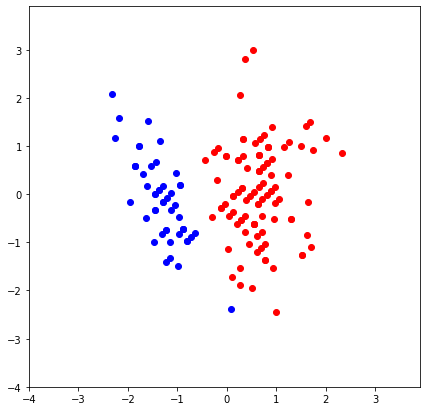

In [25]:
plt.figure(figsize=(7,7))
gr_dataset()
gr_membership_contour(clf.predict)
plt.show()

In [26]:

#gr_dataset()
x = np.arange(-4, 4, .1)
y = np.arange(-4, 4, .1)
X, Y = np.meshgrid(x, y)
#print(Y)
zs = np.array([clf.predict(np.array(list(zip(np.ravel(x), np.ravel(y)))))
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
normalized = (Z-Z.min())/(Z.max()-Z.min())
#gr_membership_contour(clf.predict)

#plt.show()

/home/alessia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


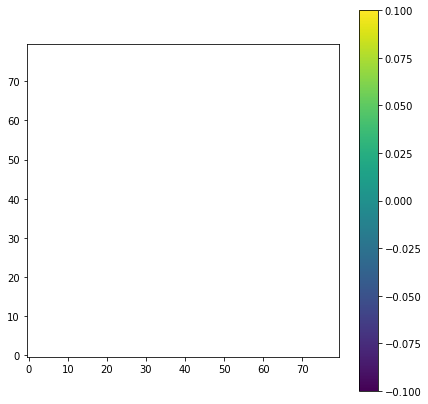

In [27]:
plt.figure(figsize=(7,7))
plt.imshow(normalized)
plt.colorbar()
plt.gca().invert_yaxis()
plt.show()